Task 4: Statistical Modeling
Data Preparation: Handle missing data, perform feature engineering, encode categorical data, and split data into train/test sets.

Modeling Techniques: Implement models like Linear Regression, Decision Trees, Random Forests, and XGBoost.

Model Evaluation: Evaluate models using metrics like accuracy, precision, recall, and F1-score.

Feature Importance Analysis: Use SHAP or LIME to interpret model predictions.


In [64]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Add the root directory to sys.path
sys.path.append(os.path.abspath('..'))

from scripts.model_data_process import data_load , missing_values, delete_unwanted_column , delete_duplicated_rows , object_to_number , lable_encoding  , one_hot_encoding, target_variable_and_features , train_test_split_selection , feature_scaling 

In [65]:
#importing the model building functions
from scripts.model import model_building, define_parameter_grid_gridsearchcv , train_each_model_by_gridsearchcv  , train_each_model, model_Test


In [66]:
path = '../data/data.csv'

data = data_load(path)
data.head()

c:\Users\Dagi\Documents\KAIM\Week-3\insurance-risk-analytics\scripts\model_data_process.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
4,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0


lets remove the columns i have not used to minimize the size

In [67]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [68]:
len(data.columns)

52

In [69]:

columns_to_drop = ['UnderwrittenCoverID', 'PolicyID', 'NumberOfDoors', 
                   'VehicleIntroDate', 'IsVATRegistered', 'Title', 
                   'LegalType', 'Language']
data1 =delete_unwanted_column(data , columns_to_drop)


In [70]:
data1.columns

Index(['TransactionMonth', 'Citizenship', 'Bank', 'AccountType',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [71]:
len(data1.columns)

44

looks the missing values

In [72]:
missing_values(data1)

TransactionMonth                 0
Citizenship                      0
Bank                             0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
CustomValueEstimate              0
AlarmImmobiliser                 0
TrackingDevice                   0
CapitalOutstanding               0
NewVehicle                       0
WrittenOff                       0
Rebuilt                          0
Converted           

no missing values let remove duplicated rows 

In [73]:
data1.shape

(790093, 44)

In [74]:
data2 = delete_duplicated_rows(data1)

In [75]:
data2.shape

(669615, 44)

lets change object to number

In [76]:
data2.dtypes

TransactionMonth             object
Citizenship                  object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
CustomValueEstimate         float64
AlarmImmobiliser             object
TrackingDevice               object
CapitalOutstanding           object
NewVehicle                   object
WrittenOff                   object
Rebuilt                     

In [77]:
numeric_cols = ['CapitalOutstanding', 'NumberOfVehiclesInFleet', 'ExcessSelected']
data3 = object_to_number(data2,numeric_cols)

In [78]:
data3.dtypes

TransactionMonth             object
Citizenship                  object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
CustomValueEstimate         float64
AlarmImmobiliser             object
TrackingDevice               object
CapitalOutstanding          float64
NewVehicle                   object
WrittenOff                   object
Rebuilt                     

Lable Encoding

In [79]:
label_encoding_columns = [
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
    'StatutoryClass', 'StatutoryRiskType', 'ExcessSelected','TransactionMonth', 'Citizenship', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 
    'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 
    'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
    'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 
    'NumberOfVehiclesInFleet', 'TermFrequency'
]
data4 = lable_encoding(data3,label_encoding_columns)

In [80]:
#object changed to number
data4.head()

,TransactionMonth,Citizenship,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,17,0,2,0,1,2,0,2,1459,12,...,0,26,21,5,1,2,0,0,21.929825,0.0
1,19,0,2,0,1,2,0,2,1459,12,...,0,26,21,5,1,2,0,0,21.929825,0.0
2,21,0,2,0,1,2,0,2,1459,12,...,0,26,21,5,1,2,0,0,0.000000,0.0
3,21,0,2,0,1,2,0,2,1459,12,...,0,16,13,5,1,2,0,0,0.000000,0.0
4,15,0,2,0,1,2,0,2,1459,12,...,0,21,18,5,1,2,0,0,3.256435,0.0


Target variable and features

In [81]:
# Perform label encoding
data4 = lable_encoding(data3, label_encoding_columns)


In [82]:
# Check the unique values in the TotalClaims column of the encoded DataFrame
print(data4['TotalClaims'].unique())

[0.]


In [83]:
X , y_claims = target_variable_and_features(data4)


In [84]:
y_claims.value_counts()

TotalClaims
0.0    669615
Name: count, dtype: int64

split train and test data

In [85]:
x_train , x_test ,  y_train_claims , y_test_claims  = train_test_split_selection(X,y_claims)

In [86]:
x_trian_scaled ,x_test_scaled = feature_scaling(x_train,x_test)

lets start building model

In [87]:

lr_model, dt_model, rfr_model, xgb_model = model_building()


In [88]:
lr_grid, dt_grid, rf_grid, xgb_grid = define_parameter_grid_gridsearchcv(lr_model, dt_model, rfr_model, xgb_model)


In [89]:
lr_model, dt_model, rfr_model, xgb_model = train_each_model(lr_model, dt_model, rfr_model, xgb_model, x_trian_scaled, y_train_claims)

finfish lr
finfish dt
finfish rfr
finfish xgb


In [90]:
# Evaluate the Linear Regression model
mae, mse, r2, y_pred = model_Test(lr_model, x_test_scaled, y_test_claims)

# Print the evaluation metrics
print("Linear Regression - MAE:", mae, "MSE:", mse, "R2:", r2)

Linear Regression - MAE: 0.0 MSE: 0.0 R2: 1.0


In [91]:
mae , mse , r2 , y_pred

(0.0, 0.0, 1.0, array([0., 0., 0., ..., 0., 0., 0.], shape=(133923,)))

In [92]:
mae

0.0

In [93]:
mse

0.0

In [94]:
r2

1.0

In [95]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(133923,))

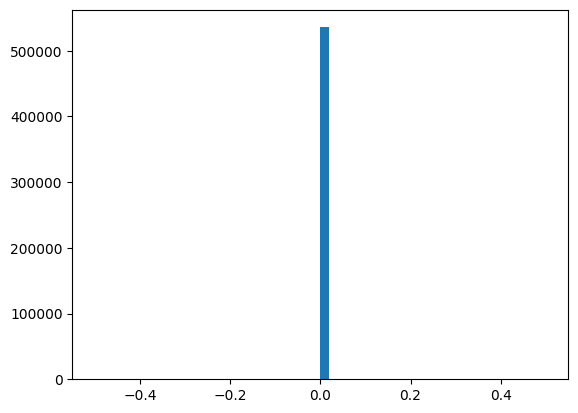

In [96]:


plt.hist(y_train_claims, bins=50)
plt.show()

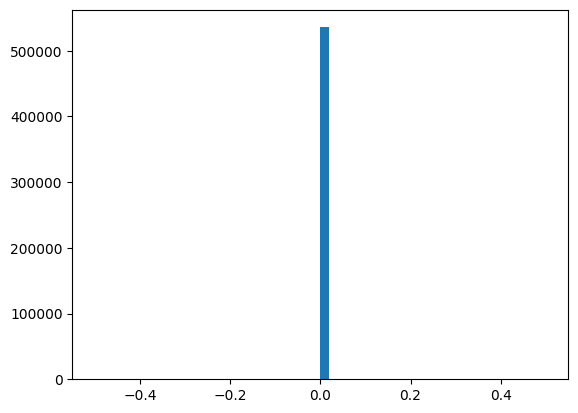

In [97]:


y_train_claims_log = np.log1p(y_train_claims)  # Applies log(1 + x) to avoid issues with zeros
plt.hist(y_train_claims_log, bins=50)
plt.show()